In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [240]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,accuracy_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_validate

In [241]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [242]:
pd.pandas.set_option('display.max_columns',None)

In [243]:
data=pd.read_csv('C:/Users/Microsoft/Desktop/deep learn/Churn_Modelling.csv')

In [244]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [245]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [246]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [247]:
data.drop(columns=['RowNumber','CustomerId'],inplace=True)

In [248]:
data.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [249]:
data.duplicated().sum()

0

In [250]:
dataframe = pd.DataFrame(dict(dtypes=data.dtypes,null_values=data.isnull().sum(),unique=data.nunique()))

In [251]:
dataframe

,dtypes,null_values,unique
Surname,object,0,2932
CreditScore,int64,0,460
Geography,object,0,3
Gender,object,0,2
Age,int64,0,70
Tenure,int64,0,11
Balance,float64,0,6382
NumOfProducts,int64,0,4
HasCrCard,int64,0,2
IsActiveMember,int64,0,2


In [252]:
data.drop(columns=['Surname'],inplace=True)

In [253]:
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [254]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## Data PreProcessing.

In [255]:
data[data['Geography']=='France']['Exited'].mean()

0.16154766653370561

In [256]:
data[data['Geography']=='Spain']['Exited'].mean()

0.1667339523617279

In [257]:
data[data['Geography']=='Germany']['Exited'].mean()

0.32443204463929853

In [258]:
c = {'France':0,'Spain':1,'Germany':2}
data['Geography'] = data['Geography'].map(c)

In [259]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,1,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,1,Female,43,2,125510.82,1,1,1,79084.10,0


In [260]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [261]:
data[data['Gender']=='Male']['Exited'].mean()

0.16455928165658787

In [262]:
data[data['Gender']=='Female']['Exited'].mean()

0.2507153863086066

In [263]:
f = {'Male':0,'Female':1}

In [264]:
data['Gender']=data['Gender'].map(f)

In [265]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


## Scalling

In [266]:
x=data.drop(columns=['Exited'])
y = data['Exited']

In [267]:
x.shape,y.shape

((10000, 10), (10000,))

In [268]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,stratify=y,train_size=0.80)

In [269]:
x_train.shape,x_test.shape

((8000, 10), (2000, 10))

In [270]:
scaler =StandardScaler()
x_train_scalled= scaler.fit_transform(x_train)
x_test_scalled  = scaler.transform(x_test)

In [271]:
X_train = x_train_scalled
X_test  = x_test_scalled

In [272]:
X_train.shape

(8000, 10)

In [273]:
y_train= y_train.to_numpy()
y_test  = y_test.to_numpy()

# Model Creation.

In [274]:
model = Sequential()
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',input_dim=X_train.shape[1]))
model.add(Dropout(0.20))
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.20))
model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.20))
model.add(Dense(1,activation='sigmoid',kernel_initializer='he_uniform'))

In [275]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [276]:
history=model.fit(X_train,y_train,batch_size=10,epochs=15,verbose=1,validation_split=0.20)

Train on 6400 samples, validate on 1600 samples
Epoch 1/15
6400/6400 [==============================] - 4s 654us/sample - loss: 0.4844 - accuracy: 0.7937 - val_loss: 0.4099 - val_accuracy: 0.8281
Epoch 2/15
6400/6400 [==============================] - 3s 413us/sample - loss: 0.4226 - accuracy: 0.8225 - val_loss: 0.3710 - val_accuracy: 0.8569
Epoch 3/15
6400/6400 [==============================] - 4s 572us/sample - loss: 0.4003 - accuracy: 0.8345 - val_loss: 0.3614 - val_accuracy: 0.8675
Epoch 4/15
6400/6400 [==============================] - 3s 474us/sample - loss: 0.3863 - accuracy: 0.8444 - val_loss: 0.3562 - val_accuracy: 0.8575
Epoch 5/15
6400/6400 [==============================] - 3s 408us/sample - loss: 0.3824 - accuracy: 0.8419 - val_loss: 0.3414 - val_accuracy: 0.8669
Epoch 6/15
6400/6400 [==============================] - 3s 514us/sample - loss: 0.3725 - accuracy: 0.8441 - val_loss: 0.3416 - val_accuracy: 0.8712
Epoch 7/15
6400/6400 [==============================] - 4s 556us

In [277]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_37 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_38 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)               

## Model Accuarcy and Evalution.

In [278]:
val_loss,val_accurayc=model.evaluate(X_test,y_test,batch_size=20,verbose=1)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [279]:
y_pred = model.predict_classes(X_test)
y_pred = y_pred.ravel()
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [280]:
dataframe = pd.DataFrame(dict(actual=y_test,predited=y_pred))

In [281]:
dataframe.head()

,actual,predited
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [282]:
mat = confusion_matrix(y_pred,y_test)
mat

array([[1550,  243],
       [  43,  164]], dtype=int64)

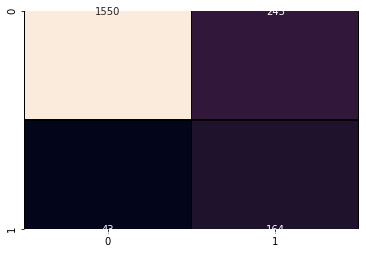

In [283]:
sns.heatmap(mat,annot=True,fmt='d',linecolor='black',linewidths=0.5,cbar=False)
plt.show()

In [284]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92      1593
           1       0.79      0.40      0.53       407

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



## Cross validation.

In [285]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [286]:
def set_model():
    model = Sequential()
    model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',input_dim=X_train.shape[1]))
    model.add(Dropout(0.20))
    model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.20))
    model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.20))
    model.add(Dense(1,activation='sigmoid',kernel_initializer='he_uniform'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model
model

classifier = KerasClassifier(set_model,batch_size=20,epochs=15)
accuracy  = cross_val_score(classifier,X_train,y_train,scoring='accuracy',cv=10,n_jobs=-1)    

In [287]:
accuracy

array([0.84375, 0.8475 , 0.84375, 0.88125, 0.8725 , 0.8325 , 0.85875,
       0.82625, 0.85875, 0.88   ])

In [288]:
print('Accuarcy mean :-',accuracy.mean())

Accuarcy mean :- 0.8545


In [289]:
print('Variance of accuracy :-',accuracy.std())

Variance of accuracy :- 0.018133187805788584


- From the above we can say that,the accuarcy we are calculated for cv=10 showing how they are reliablle.

In [290]:
print('Mean squared error of the model :-',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean squared error of the model :- 0.3781534080237807


In [291]:
print('Variance of the actual :-',np.std(y_test))

Variance of the actual :- 0.4026012295063194


- Sinece the mean sqaured error is lower than the actual eror that mean our model is good enought.
- Explained variance is greater than unexplained variance.

## AUC-ROC Curve.

In [292]:
from plotnine import aes,ggplot,ggtitle,geom_abline,geom_area

In [293]:
proba = model.predict_proba(X_test)
fpr,tpr,thresh = roc_curve(y_test,proba)

In [294]:
roc_data = pd.DataFrame(dict(fpr=fpr,tpr=tpr))

In [295]:
auc = auc(fpr,tpr)

In [296]:
auc

0.852498106735395

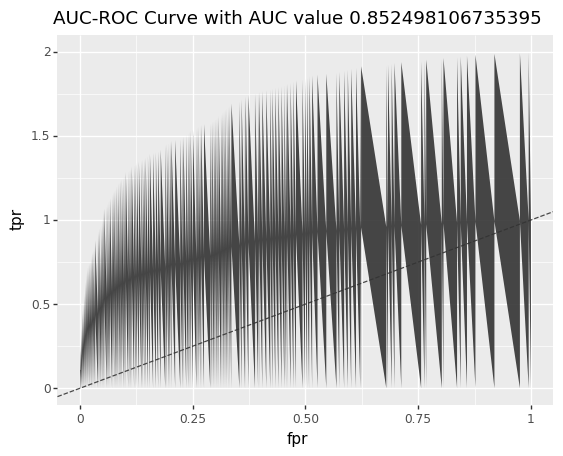

<ggplot: (-9223372036820405004)>

In [297]:
ggplot(roc_data,aes(x='fpr',y='tpr'))+geom_abline(alpha=0.7,linetype='dashed')+geom_area(alpha=0.9)+ggtitle('AUC-ROC Curve with AUC value {}'.format(auc))